In [1]:
%load_ext autoreload
import glob
import nibabel 
import nilearn
import pandas as pd
import numpy as np
import h5py
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook, tqdm
from joblib import Parallel, delayed
import logging
from IPython.core.debugger import set_trace
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import re
import os
import shutil
import pickle
import torchio

import torch
import torch.nn.functional as F

from utils import create_dicts, normalize, load, video, video_comparison

from multiprocessing import cpu_count
N_CPU = cpu_count()

from IPython.core.display import display, HTML
from celluloid import Camera

SEED = 42
%autoreload 2

In [12]:
root = '../MICCAI_BraTS2020_TrainingData/'
tensors_paths = [os.path.join(root,p) for p in os.listdir(root)]

In [15]:
os.listdir(tensors_paths[0])

['BraTS20_Training_333_t1ce.nii.gz',
 'BraTS20_Training_333_t1.nii.gz',
 'BraTS20_Training_333_seg.nii.gz',
 'BraTS20_Training_333_flair.nii.gz',
 'BraTS20_Training_333_t2.nii.gz']

In [20]:
mins = defaultdict(list)
maxs = defaultdict(list)

for path in tqdm(tensors_paths):
    for feature in os.listdir(path):
        data = nibabel.load(os.path.join(path, feature)).get_fdata()
        f = feature.split('.')[0].split('_')[-1]
        mins[f].append(data.min())
        maxs[f].append(data.max())
#         break
#     break

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 369/369 [05:48<00:00,  1.06it/s]


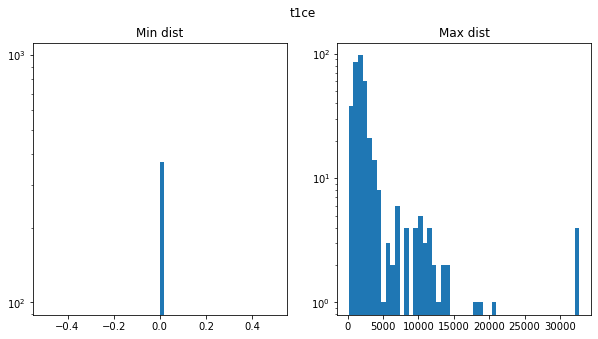

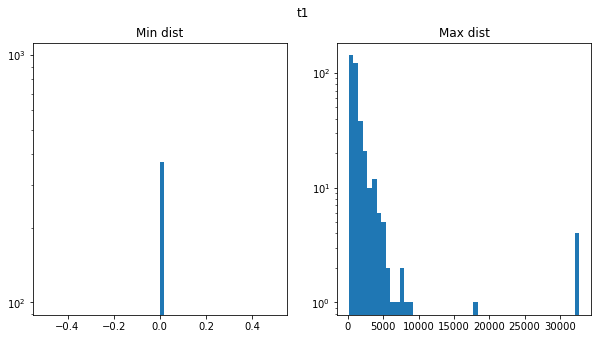

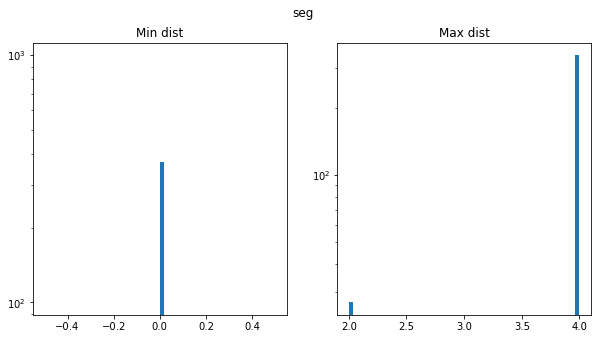

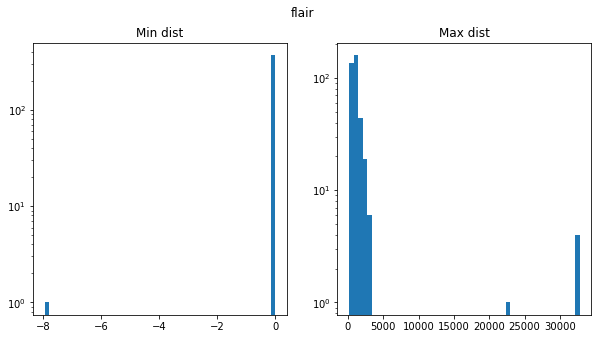

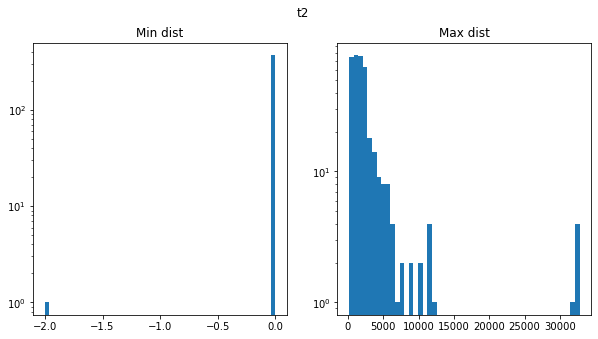

In [21]:
for f in mins.keys():
    fig, axes = plt.subplots(ncols=2,nrows=1, figsize=(10,5))
    
    axes[0].hist(mins[f], bins=50)
    axes[0].set_yscale('log')
    axes[0].set_title('Min dist')
    
    axes[1].hist(maxs[f], bins=50)
    axes[1].set_yscale('log')
    axes[1].set_title('Max dist')
    
    fig.suptitle(f) 
plt.show()